**Problem Statement:**

The goal of this project is to predict Sales based on advertising budgets allocated to TV, Radio, and Newspaper.

Importing standard libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

**Data collection and understanding**

In [4]:
data = pd.read_csv('/content/advertising.csv')

In [6]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [7]:
data.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Average Spends on campaigns for TV, Radio and Newspaper are
~ 147K , 23.2K and 30.5k respectively.The spending are highly variable in TV and Newspaper ad campaigns.It might be due to seasonal changes or campaign creativity differences.

Average sales from the ad spends are 15.1K with ~ 5K vairabilty.The sales values range from 1.6 to 27, with the majority of values concentrated below 20. This indicates that most of the campaigns are yielding moderate results, while a few high-performing campaigns are driving significant sales. This presents an opportunity to focus on optimizing those campaigns that are performing below potential.

**DATA PRE-PROCESSING**

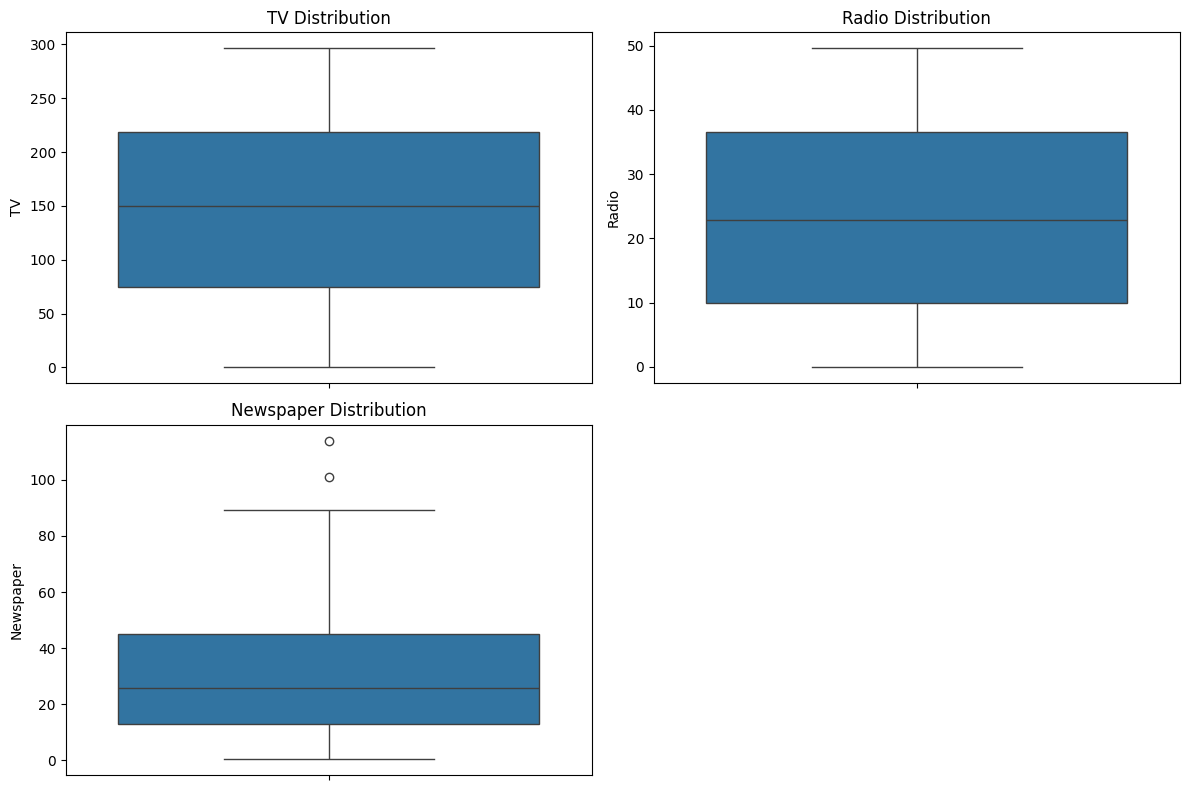

In [10]:
import seaborn as sns
plt.figure(figsize=(12, 8))
for i, col in enumerate(['TV', 'Radio', 'Newspaper'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data[col])
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()


Shape before removing outliers: (198, 4)
Shape after removing outliers from Newspaper: (198, 4)


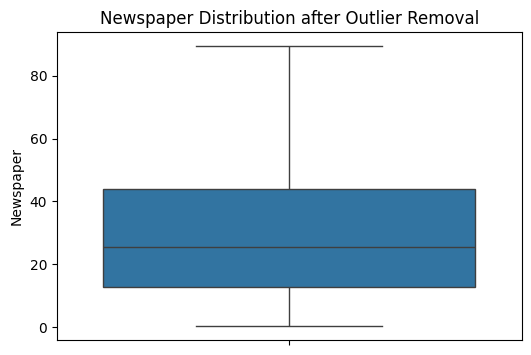

In [12]:
# Removing outliers from the 'Newspaper' column using the IQR method
Q1 = data['Newspaper'].quantile(0.25)
Q3 = data['Newspaper'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data_filtered = data[(data['Newspaper'] >= lower_bound) & (data['Newspaper'] <= upper_bound)]

# Display the shape before and after outlier removal
print("Shape before removing outliers:", data.shape)
print("Shape after removing outliers from Newspaper:", data_filtered.shape)

# Optionally, visualize the data after outlier removal to confirm
plt.figure(figsize=(6, 4))
sns.boxplot(data_filtered['Newspaper'])
plt.title('Newspaper Distribution after Outlier Removal')
plt.show()

# You can choose to replace the original data with the filtered data
data = data_filtered

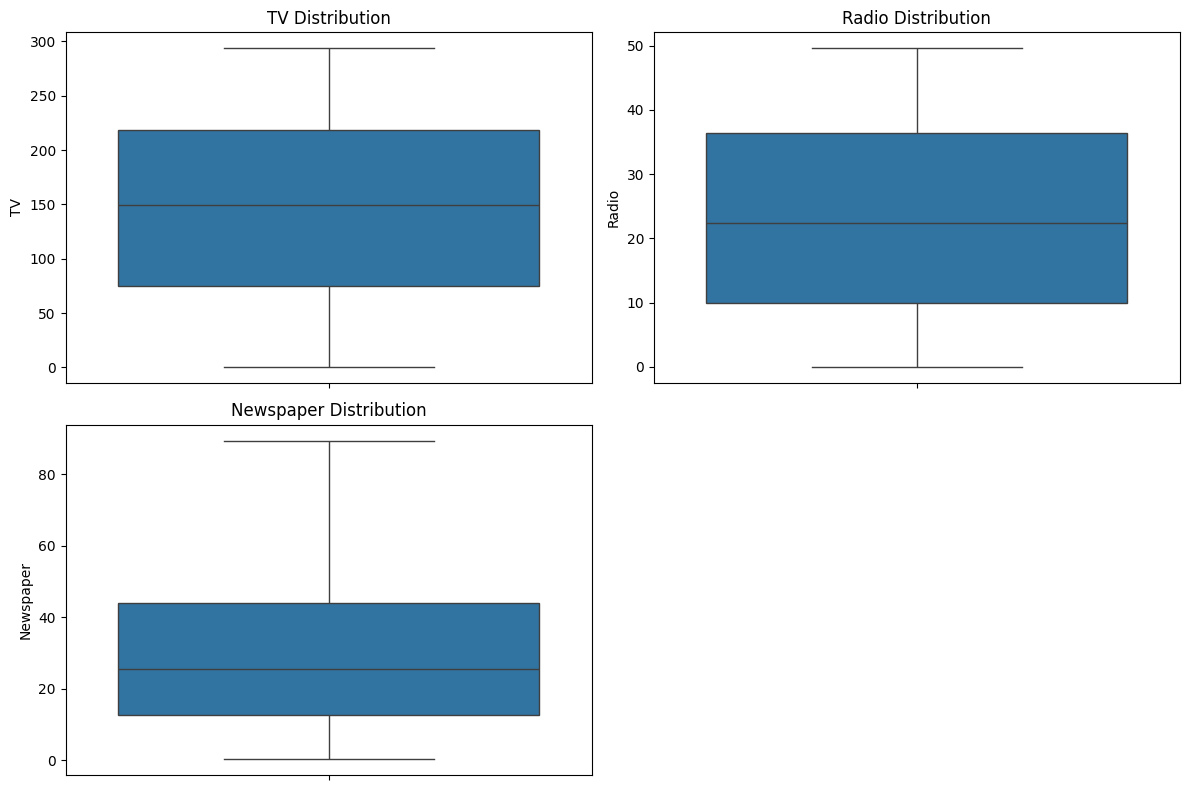

In [13]:
import seaborn as sns
plt.figure(figsize=(12, 8))
for i, col in enumerate(['TV', 'Radio', 'Newspaper'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data[col])
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()


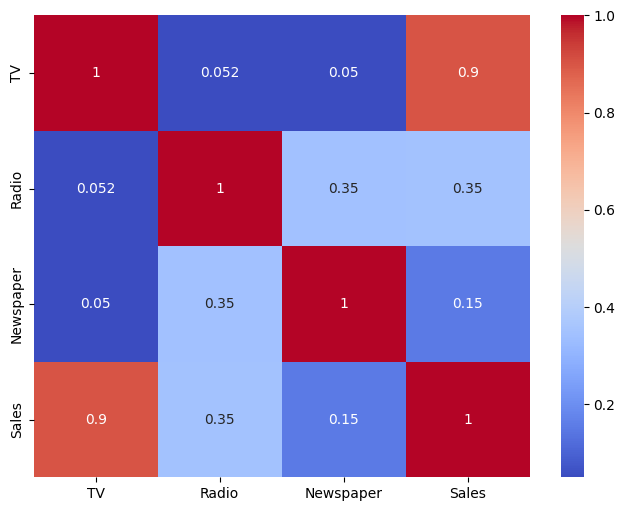

In [14]:
correlation =data_filtered.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.show()

From the Heatmap we are able to understand the relationship of features with target.

Key takeaways:

1.TV as media channel drives the sales massively.

2.Radio has a moderate effect and can support the sales.

3.Newspaper has low correlation, so the company is not getting good ROI with Newspaper campaigns

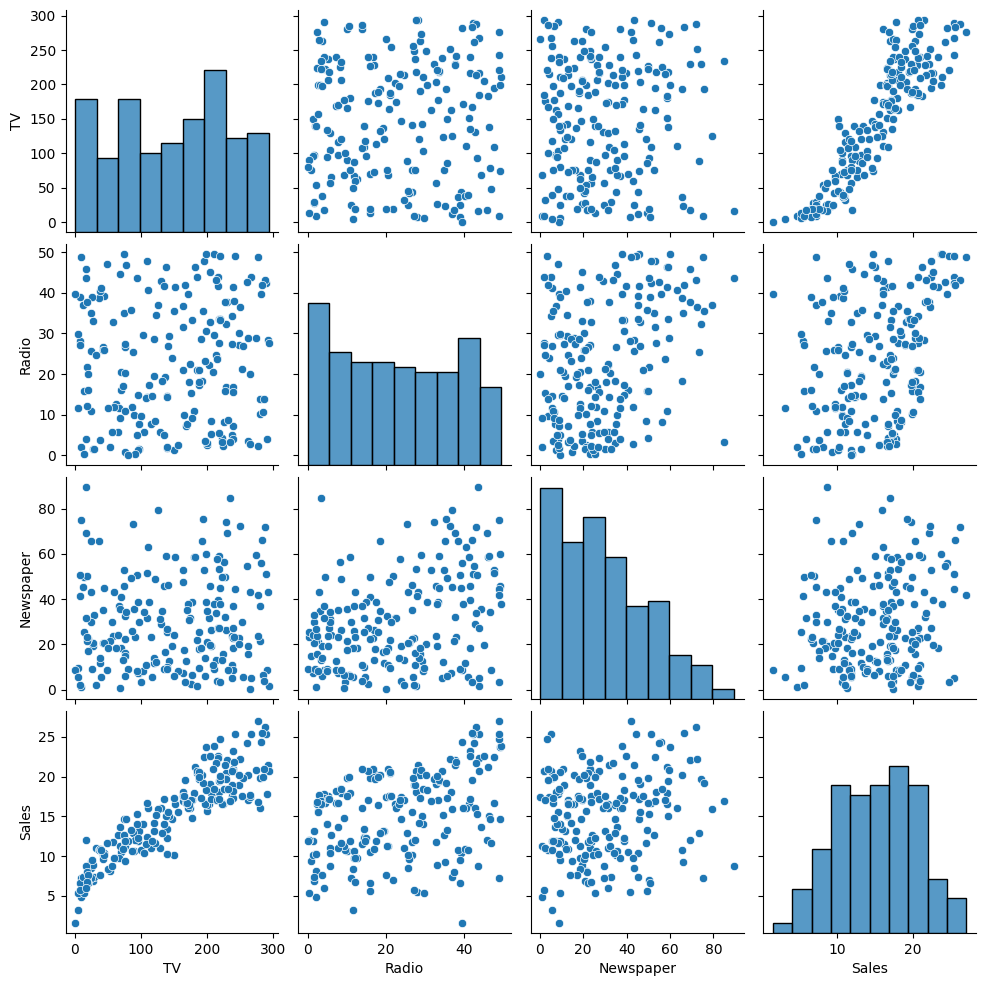

In [15]:
sns.pairplot(data_filtered)
plt.show()


From the pairplot-

Backing up the findings using correlation, the relationship between Sales and TV is more linear.

It seems there's no clear linear relationships between the Features.


**DATA MODELLING**

In [16]:
X = data_filtered[['TV', 'Radio', 'Newspaper']]
y = data_filtered['Sales']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     590.4
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           3.02e-97
Time:                        06:57:06   Log-Likelihood:                -380.34
No. Observations:                 198   AIC:                             768.7
Df Residuals:                     194   BIC:                             781.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6002      0.314     14.673      0.0

In [57]:
# Get the predicted values
y_pred = model.predict(X)

# Calculate evaluation metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

MAE: 1.2452829852126126
MSE: 2.7488763747384293
RMSE: 1.6579735748010067
R-squared: 0.9005653335942998


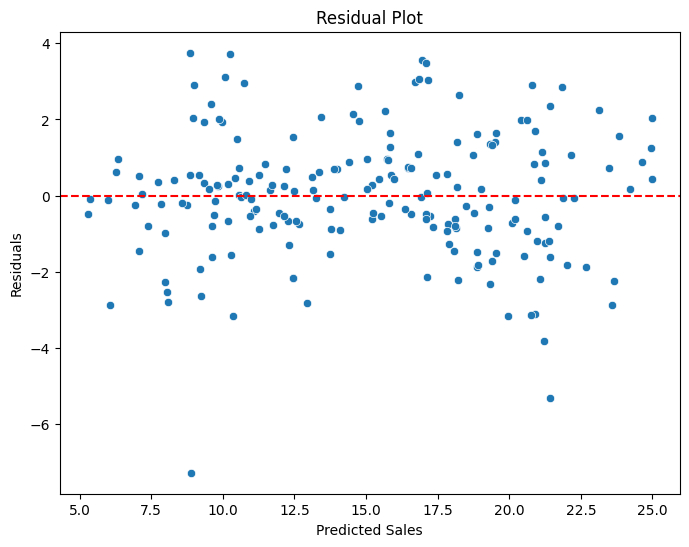

In [ ]:
# Residual Plot
# Calculate residuals
residuals = y - y_pred

# Create a residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

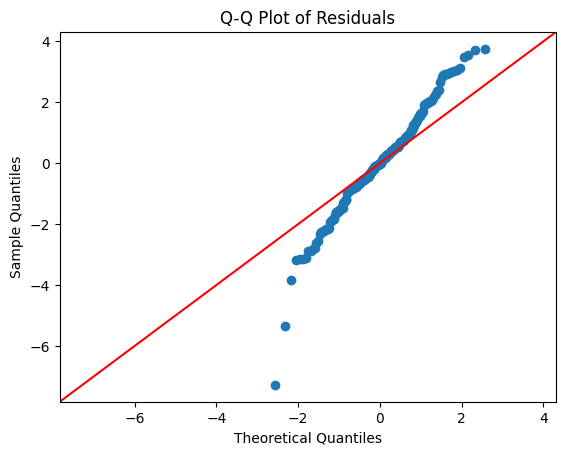

In [ ]:
import statsmodels.api as sm

# Q-Q plot for normality of residuals
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

The Q-Q plot analysis reveals that while the model’s predictions for sales are generally accurate, there are some outliers and deviations in the residuals, particularly at the extremes. These outliers suggest that the model struggles to predict sales accurately for both very high and very low advertising budgets. This may lead to underperformance in certain campaigns, particularly those with atypical budget allocations.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVIF for independent variables:")
vif_data


VIF for independent variables:


,feature,VIF
0,const,6.987479
1,TV,1.003863
2,Radio,1.137887
3,Newspaper,1.137631


 Interpretation of VIF values:
 A VIF value of 1 means there is no correlation between the independent variable and any other variables.

 A VIF between 1 and 5 suggests moderate correlation, which may not require immediate attention.